# 라이브러리 호출

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString, MultiLineString   

# 함수선언

In [2]:
#폴더에서 엑셀파일과 csv파일 불러와주는 함수
def readcsv_(Path_folder, header = 0):

    file_list = [file for file in os.listdir(Path_folder) if file.endswith(('.csv','.xlsx'))] 
    df_list = []
    encodings = ['utf-8', 'cp949', 'euc-kr', 'cp1252', 'cp850']

    for idx, file in enumerate(file_list):
        print(f'({idx+1}) {file}')
        if file.endswith(".csv"):
            for cp in encodings:
                try:
                    locals()[f'df{idx+1}'] = pd.read_csv(Path_folder+file, encoding = cp, header = header)
                    df_list.append(locals()[f'df{idx+1}'])
                    break
                except: # 에러 종류
                    pass
        elif file.endswith(".xlsx"):
                locals()[f'df{idx+1}'] = pd.read_excel(Path_folder+file, header = header)
                df_list.append(locals()[f'df{idx+1}'])

        else:
            print(f'     {"*"*8}이 파일은 읽을 수 없습니다{"*"*8}')

    print(f'\n폴더 내 csv / xlsx 파일 개수: {len(file_list)}개')
    print(f'총 데이터프레임 개수: {len(df_list)}개')

    return df_list

# 가로수길 데이터

In [3]:
garosugil = readcsv_('/Users/pym/data/ddareung/전국가로수길정보표/')

(1) 전국가로수길정보표준데이터.csv

폴더 내 csv / xlsx 파일 개수: 1개
총 데이터프레임 개수: 1개


In [4]:
garosugil[0].drop(['관리기관전화번호', '관리기관명', '제공기관코드', '도로구간','도로종류','가로수길소개', '식재년도','도로명'],\
                  axis =1, inplace=True)
#필요없는 컬럼인 관리기관전화번호, 관리기관명, 제공기관코드, 도로구간, 도로종류, 가로수길소개, 식재년도, 도로명 삭제

In [5]:
garosugil[0].isna().sum()
#삭제할 철럼 삭제하고 결측치를 조회해보니 가로수수량에서 결측치 존재한다. 서울지역 가로수만 뽑아내고 결측치를 채워줄 예정.

가로수길명         0
가로수길시작위도      0
가로수길시작경도      0
가로수길종료위도      0
가로수길종료경도      0
가로수종류         0
가로수수량       838
가로수길길이        0
데이터기준일자       0
제공기관명         0
dtype: int64

In [6]:
Garosugil = garosugil[0][garosugil[0].제공기관명.str.contains('서울특별시')]
#서울만 해당하는 데이터프레임 생성

In [7]:
Garosugil.isna().sum()
#서울만 해당하는 가로수 수량 결측치 139개

가로수길명         0
가로수길시작위도      0
가로수길시작경도      0
가로수길종료위도      0
가로수길종료경도      0
가로수종류         0
가로수수량       139
가로수길길이        0
데이터기준일자       0
제공기관명         0
dtype: int64

In [8]:
Garosugil[Garosugil.가로수수량 == 0] 
#결측치가 아닌 가로수수량이 0인 경우가 3건 존재한다.

,가로수길명,가로수길시작위도,가로수길시작경도,가로수길종료위도,가로수길종료경도,가로수종류,가로수수량,가로수길길이,데이터기준일자,제공기관명
1176,증산로1길,37.579794,126.901723,37.578835,126.903845,없음,0.0,0.23,2019-09-20,서울특별시 은평구
4891,방화대로 6길,37.555010,126.816690,37.554570,126.819010,느티나무,0.0,0.23,2020-02-12,서울특별시 강서구
4892,방화대로 6라길,37.556600,126.818360,37.555070,126.818420,느티나무,0.0,0.17,2020-02-12,서울특별시 강서구


In [9]:
Garosugil[Garosugil.가로수수량.isna()==False].head(2)#가로수가 결측치인것을 제외한 데이터프레임

,가로수길명,가로수길시작위도,가로수길시작경도,가로수길종료위도,가로수길종료경도,가로수종류,가로수수량,가로수길길이,데이터기준일자,제공기관명
732,시흥대로,37.485637,126.903083,37.491981,126.908463,느티나무,86.0,1.0,2020-04-30,서울특별시 영등포구
733,디지털로,37.487997,126.898076,37.496673,126.907745,은행나무 등,297.0,1.4,2020-04-30,서울특별시 영등포구


In [10]:
Garosugil[Garosugil.가로수수량.isna()].head(2)#가로수가 결측치인 경우

,가로수길명,가로수길시작위도,가로수길시작경도,가로수길종료위도,가로수길종료경도,가로수종류,가로수수량,가로수길길이,데이터기준일자,제공기관명
1987,양재대로62길,37.494552,127.122054,37.499203,127.11757,왕벚나무,NaN,0.9,2020-02-20,서울특별시 송파구
1988,올림픽로37길,37.522068,127.116166,37.520213,127.10440,복자기,NaN,1.6,2020-02-20,서울특별시 송파구


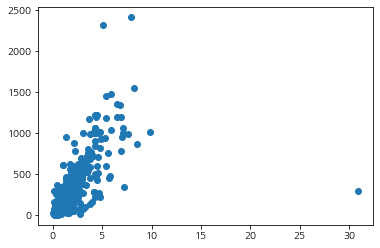

In [11]:
tmp = Garosugil[Garosugil.가로수수량.isna()==False]#가로수가 결측치인것을 제외한 데이터프레임

plt.scatter(tmp.가로수길길이, tmp.가로수수량)
#가로수길 길이와 가로수수량은 선형관계가 있다고 보고 두가지 변수를 가지고 단순선형회귀식을 만들고 그 가중치값을 통해 결측치를 채워준다.
#밑에 산점도 그래프를 보면 3개의 이상치가 보여서 이상치를 제거해주고 진행할 예정

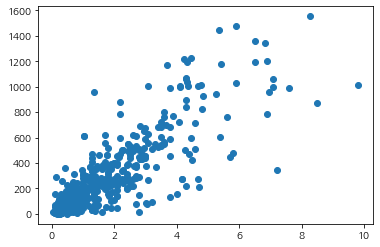

In [12]:
#tmp[tmp.가로수길길이 > 30].index.tolist()
#인덱스 2985
#tmp[tmp.가로수수량 > 2000].index.tolist()
#인덱스 3264,4730
tmp_1 = tmp.iloc[(tmp.index != 2985)&(tmp.index != 3264)&(tmp.index != 4730)]
#이상치를 제거한 데이터프레임

plt.scatter(tmp_1.가로수길길이, tmp_1.가로수수량)
#이상치를 제거한 후 다시 산점도 그래프를 그린 결과

In [13]:
#단순선형회귀를 통해 결측치값 채워주기
import numpy as np

x_train = np.array(tmp_1.가로수길길이)
y_train = np.array(tmp_1.가로수수량)

W = 0.0
b = 0.0

n_data = len(x_train)

epochs = 5000
learning_rate = 0.01

for i in range(epochs):
    hypothesis = x_train * W + b
    cost = np.sum((hypothesis - y_train) ** 2) / n_data
    gradient_w = np.sum((W * x_train - y_train + b) * 2 * x_train) / n_data
    gradient_b = np.sum((W * x_train - y_train + b) * 2) / n_data

    W -= learning_rate * gradient_w
    b -= learning_rate * gradient_b

    if i % 100 == 0:
        print('Epoch ({:10d}/{:10d}) cost: {:10f}, W: {:10f}, b:{:10f}'.format(i, epochs, cost, W, b))

print('W: {:10f}'.format(W))
print('b: {:10f}'.format(b))
print('result : ')
print(x_train * W + b)

#위의 선형회귀식을 통해 가중치와 상수값을 구함.
#W: 153.007005
#b:  15.501313

Epoch (         0/      5000) cost: 120249.127907, W:  12.713972, b:  4.454070
Epoch (       100/      5000) cost: 19643.211769, W: 147.580324, b: 29.643617
Epoch (       200/      5000) cost: 19546.862230, W: 150.948133, b: 20.877479
Epoch (       300/      5000) cost: 19532.945645, W: 152.224527, b: 17.544534
Epoch (       400/      5000) cost: 19530.935543, W: 152.709623, b: 16.277843
Epoch (       500/      5000) cost: 19530.645205, W: 152.893985, b: 15.796435
Epoch (       600/      5000) cost: 19530.603269, W: 152.964051, b: 15.613474
Epoch (       700/      5000) cost: 19530.597212, W: 152.990681, b: 15.543940
Epoch (       800/      5000) cost: 19530.596337, W: 153.000801, b: 15.517514
Epoch (       900/      5000) cost: 19530.596211, W: 153.004647, b: 15.507470
Epoch (      1000/      5000) cost: 19530.596193, W: 153.006109, b: 15.503653
Epoch (      1100/      5000) cost: 19530.596190, W: 153.006665, b: 15.502202
Epoch (      1200/      5000) cost: 19530.596190, W: 153.006876

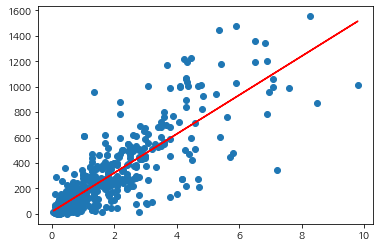

In [14]:
plt.scatter(tmp_1.가로수길길이, tmp_1.가로수수량)
plt.plot(tmp_1.가로수길길이,x_train * W + b,color="red")
#예측선 시각화

In [15]:
#가로수수량이 결측치일경우 위에서 구한 단순선형회기식으로 가로수길길이 값을 사용해 결측치를 채워준다.
Garosugil.가로수수량 = Garosugil.apply(lambda x : x['가로수길길이']*153.007005 + 15.501313 \
                                  if type(x['가로수수량']) != int else x, axis=1)

/Users/pym/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
Garosugil.isna().sum()
#결측치 처리 완료.

가로수길명       0
가로수길시작위도    0
가로수길시작경도    0
가로수길종료위도    0
가로수길종료경도    0
가로수종류       0
가로수수량       0
가로수길길이      0
데이터기준일자     0
제공기관명       0
dtype: int64

In [17]:
Garosugil = Garosugil[(Garosugil.가로수수량 == 0)==False]
#가로수수량이 0인경우를 제외시킴.

In [18]:
#가로수길길이를 float형으로 변환
Garosugil.가로수길길이 = Garosugil.가로수길길이.astype(float)
#가로수길 데이터 자체에 일반 나무가 심어져 있는 길이 많다. 따라서 따릉이 이용자들이 평균적으로 이용하는 거리인 3.6km 이상의 가로수길을 선정하였다.
Garosugil = Garosugil[Garosugil.가로수길길이 > 3.6]

#가로수길이 서울을 벗어나는 경우를 주소가 아닌 위도경도를 통해 한번더 제외시킨다.
Garosugil['가로수길종료위도'] = Garosugil.가로수길종료위도.astype(float)
Garosugil['가로수길종료경도'] = Garosugil.가로수길종료경도.astype(float)
Garosugil['가로수길시작위도'] = Garosugil.가로수길시작위도.astype(float)
Garosugil['가로수길시작경도'] = Garosugil.가로수길시작경도.astype(float)

Garosugil = Garosugil[(Garosugil.가로수길종료위도 < 37.413294) == False]
Garosugil = Garosugil[(Garosugil.가로수길종료위도 > 37.715133)==False]
Garosugil.drop_duplicates(keep='first', inplace=True)


# 서울시 인구정보 2019

In [32]:
cencus2019 = readcsv_('/Users/pym/data/ddareung/서울인구2019/')

#자치구, 세대, 인구합계, 세대당인구, 65세이상 고령자 살리기
cencus2019[0] = cencus2019[0][['자치구','세대','인구 합계','세대당인구','65세이상고령자']]

#합계 로우 삭제
cencus2019[0] = cencus2019[0].iloc[1:,:]

house_count = cencus2019[0]
house_count = house_count[['자치구','세대']]

(1) 서울인구 2019.csv

폴더 내 csv / xlsx 파일 개수: 1개
총 데이터프레임 개수: 1개


In [28]:
house_count

,자치구,세대
1,종로구,"73,947"
2,중구,"62,739"
3,용산구,"110,126"
4,성동구,"135,838"
5,광진구,"164,428"
6,동대문구,"164,191"
7,중랑구,"181,579"
8,성북구,"192,592"
9,강북구,"144,277"
10,도봉구,"138,508"


# 자치구연령대별인구수

In [35]:
#데이터 불러오기
age_population = pd.read_csv('./new_data/자치구연령대별인구수.csv', encoding='cp949')
#합계 row삭제
age_population = age_population.iloc[1:,:]
#행정구역 데이터 내에 '('문자 삭제
age_population.행정구역 = age_population.행정구역.apply(lambda x : x.split('(')[0].split(' ')[1])
#컬럼명 재선언
age_population.columns=['자치구','거주자총인구수','drop', '0s','10s','20s','30s','40s','50s','60s','70s','80s','90s','100s']
#필요없는 컬럼 삭제
age_population.drop(['drop', '100s'], axis=1, inplace=True)

In [36]:
age_population

,자치구,거주자총인구수,0s,10s,20s,30s,40s,50s,60s,70s,80s,90s
1,종로구,"144,313","7,649","11,048","23,145","19,687","21,569","24,466","18,661","11,693","5,535",833
2,중구,"121,505","6,931","6,841","18,439","19,882","17,582","19,973","16,587","10,103","4,447",706
3,용산구,"220,118","13,568","15,610","32,958","37,370","34,359","34,987","26,586","15,791","7,679","1,178"
4,성동구,"289,614","20,658","20,030","45,005","48,735","44,488","46,250","35,267","19,960","8,160","1,032"
5,광진구,"342,484","19,884","26,120","62,495","55,688","51,980","53,736","41,156","21,801","8,476","1,106"
6,동대문구,"337,218","20,984","23,853","56,005","49,764","49,907","52,048","44,919","27,381","10,979","1,331"
7,중랑구,"390,106","23,389","27,005","55,893","57,839","57,225","68,512","56,668","30,765","11,340","1,432"
8,성북구,"431,391","29,209","37,397","66,624","59,748","69,014","67,913","53,273","32,732","13,646","1,802"
9,강북구,"303,859","16,051","22,226","42,655","38,608","46,207","51,643","44,646","29,383","11,088","1,325"
10,도봉구,"322,436","19,069","25,835","43,405","40,877","48,215","56,335","48,584","27,259","11,285","1,523"


# 1인가구수

In [37]:
#데이터불러오기
one_person_house = pd.read_csv('./new_data/1인가구수.csv', encoding='cp949')
#컬럼이름 설정
one_person_house.columns = ['자치구','성별','가구수']
#성별 필요없어서 삭제
one_person_house.drop('성별', axis=1,inplace=True)
#전체, 합계에 해당하는 row 삭제
one_person_house = one_person_house.iloc[2:,:]
#컬럼명 재선언
one_person_house.columns = ['자치구','1인가구수']

# 문화공간

In [38]:
#데이터 불러오기
culture_place = pd.read_csv('./new_data/서울시 문화공간 현황.csv', encoding='cp949')
#필요없는 컬럼삭제
culture_place.drop(['대표이미지','전화번호','팩스번호','홈페이지','기타사항','장르분류코드'],axis=1,inplace=True)
#추가로 필요없는 컬럼 삭제
culture_place.drop(['문화공간코드','개관일자','관람시간','객석수','관람료(원)','휴관일','무료구분'],axis=1, inplace=True)

#주소 결측치 채워줄것 리스트
juso_1 = ["서울특별시 중구 장충동2가 193-5",
"서울특별시 원효로1동",
"서울특별시 송파구 잠실6동ㅠ",
"서울특별시 노원구 상계6.7동 770-2",
"서울특별시 양천구 목1동 목동서로 201 kt정보전산센터 1층",
"서울특별시 도봉구 창동 1-9",
"서울특별시 암사3동",
"경기도 과천시 주암동 184-2",
"서울특별시 송파구 송파동 지하층 2-13번지",
"경기도 파주시 운정1동 와석순환로 415",
"경기도 하남시 미사동",
"경기도 양평군 단월면 석산리 1",
"서울특별시 중구 정동 세종대로 99",
"서울특별시 동작구 대방동 345-1"]

#앞선 리스트로 결측치 채우기
culture_place.loc[culture_place.주소.isna(), '주소'] = juso_1
#서울에 해당하는 것만 뽑기
culture_place = culture_place[culture_place.주소.str.contains('서울')]
#위도에 3이 포함되어있지 않으면 이상치임으로 처리
culture_place = culture_place[culture_place.X좌표.str.contains('3')==True]
#컬럼명 변경
culture_place.columns = ['장르분류명','문화공간명','주소','위도','경도']
#위도와 경도 float으로 설정
culture_place.위도 = culture_place.위도.apply(lambda x : float(x))
culture_place.경도 = culture_place.경도.apply(lambda x : float(x))
#문화공간명으로 겹치는 것들 삭제
culture_place.drop_duplicates(['문화공간명'], keep='first',inplace=True)
culture_place.reset_index(drop=True,inplace=True)

In [39]:
culture_place

,장르분류명,문화공간명,주소,X좌표,Y좌표
0,공연장,신도림 오페라하우스,서울시 구로구 구로동 3-39,37.5079891008,126.8909247643
1,공연장,신촌문화발전소,서울특별시 서대문구 연세로2나길 57,37.5579611736,126.9397535366
2,공연장,서울광장,서울특별시 중구 태평로2가 17-3,37. 565589,126. 978018
3,공연장,오류아트홀,서울특별시 구로구 경인로20가길 38 오류문화센터 2층(오류아트홀),37.495357487,126.8460357988
4,공연장,정효아트센터,서울특별시 서초구 사임당로18길 52-2,37.4875489437,127.0196245765
...,...,...,...,...,...
900,기타,삼청각,서울 성북구 성북동 330-115 ),37.5971248,126.9842404
901,기타,꼬스트홀,서울 중구 명동2가 1-1 ),37.5632657,126.9867360
902,기타,중구청,서울 중구 예관동 120-1 ),37.5638430,126.9976020
903,기타,남산골 한옥마을,서울 중구 필동2가 84-1 ),37.5591447,126.9936826


# 시장

In [ ]:
#시장 데이터 불러오기
market = pd.read_csv('./new_data/Market.csv')
#경도, 위도 이름 설정
market.columns = market.columns.tolist()[:-2] + ['경도','위도']
#이상치 위도 경도 삭제
x = market[market.위도 > 100].경도.tolist()
y = market[market.위도 > 100].위도.tolist()

market.loc[market.위도 > 100,'위도'] = x
market.loc[market.경도 < 100, '경도'] = y

#이름은 같으나 위치가 다른 시장이 있는 경우는 하나의 이름을 변경
market.iloc[93,2] = '강남시장_2'

# 학교

In [ ]:
#필요 없는 컬럼 삭제
school = pd.read_csv('./School_loc.csv').iloc[:,1:]

#초등학교 유치원은 제외 왜냐하면 어린 친구들은 따릉이 안탐
school = school[(school.학교종류 !='유치원')&(school.학교종류 !='초등학교')]
#폐교인경우에는 유동인구가 없기때문에 삭제
school = school[(school.학교상태 == '폐교') == False]
#인덱스 정렬
school.reset_index(drop=True,inplace=True)

#이름이 같은 경우 추가로 차별점 주기
school.iloc[765,3] = '가톨릭대학교_종로구'
school.iloc[764,3] = '가톨릭대학교_서초구'
school.iloc[823,3] = '정화예술대학교_명동캠퍼스'
school.iloc[824,3] = '정화예술대학교_남산캠퍼스'

# 유동인구

In [40]:
import pandas as pd
import datetime
#데이터 불러오기
floating = pd.read_csv('./new_data/Floating_list.csv')
#주말,평일을 뽑기위해서 일자컬럼 데이터를 datetime형식으로 변환
floating.일자 = floating.일자.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))
#datetime형식인 일자컬럼에 weekday를 적용해 요일 알아내기
floating['weekday'] = floating.일자.apply(lambda x : x.weekday())
#알아낸 요일에 함수를 적용해 평일과 주말 가려내기
floating['평일_주말'] = floating.weekday.apply(lambda x : '평일' if x<5 else '주말')
#연령대가 20대와 30대인경우만 가져오기
floating_20_30 = floating[(floating['연령대(10세단위)'] == 20)|(floating['연령대(10세단위)'] == 30)]
#각 기준으로 groupby하여 유동인구수 파악하기
moving_people_20_30s = floating_20_30.groupby(['평일_주말','군구','시간(1시간단위)'],as_index=False)[['유동인구수']].mean()
#컬럼명 재선언
moving_people_20_30s.columns = ['평일_주말','자치구','시간대','20~30대_유동인구'] #20대 시간별 유동인구

In [41]:
moving_people_20_30s

,평일_주말,자치구,시간대,20~30대_유동인구
0,주말,강남구,0,46700.063694
1,주말,강남구,1,45605.222930
2,주말,강남구,2,44934.092357
3,주말,강남구,3,44204.044586
4,주말,강남구,4,43846.114650
...,...,...,...,...
1195,평일,중랑구,19,24238.746787
1196,평일,중랑구,20,25305.880463
1197,평일,중랑구,21,26458.727506
1198,평일,중랑구,22,27612.203608


In [42]:
from tqdm.notebook import tqdm
#평일인 경우만 가져오기
moving_people_20_30s_weekday =moving_people_20_30s.loc[moving_people_20_30s['평일_주말'] == '평일'].drop('평일_주말',axis=1)
#시간대 컬럼에 값을 특정 문자열로 변경
moving_people_20_30s_weekday.시간대 = moving_people_20_30s_weekday.시간대.apply(lambda x : '평일'+str(x)+'시_유동인구')

#빈데이터프레임 선언
moving_people_20_30s_weekday_f = pd.DataFrame()
#자치구마다 평일 시간대별 유동인구가 컬럼으로 구성된 데이터프레임을 만들고 빈데이터프레임에 추가해준다.
for jachigu in tqdm(moving_people_20_30s_weekday.자치구.unique().tolist(), desc='진행도'):
    a = moving_people_20_30s_weekday[moving_people_20_30s_weekday.자치구 == jachigu].T.iloc[1:,:]
    a = a.rename(columns=a.iloc[0]).iloc[1:,:]
    a.rename(index={'20~30대_유동인구': jachigu}, inplace=True)
    a_columns = a.columns.tolist()
    a.reset_index(inplace = True)
    a.columns = ['자치구'] + a_columns
    moving_people_20_30s_weekday_f = moving_people_20_30s_weekday_f.append(a)

#주말인 경우만 가져오기
moving_people_20_30s_weekend =moving_people_20_30s.loc[moving_people_20_30s['평일_주말'] == '주말'].drop('평일_주말',axis=1)
#시간대 컬럼에 값을 특정 문자열로 변경
moving_people_20_30s_weekend.시간대 = moving_people_20_30s_weekend.시간대.apply(lambda x : '주말'+str(x)+'시_유동인구')

#빈데이터프레임 선언
moving_people_20_30s_weekend_f = pd.DataFrame()
#자치구마다 주말 시간대별 유동인구가 컬럼으로 구성된 데이터프레임을 만들고 빈데이터프레임에 추가해준다.
for jachigu in tqdm(moving_people_20_30s_weekend.자치구.unique().tolist(), desc='진행도'):
    a = moving_people_20_30s_weekend[moving_people_20_30s_weekend.자치구 == jachigu].T.iloc[1:,:]
    a = a.rename(columns=a.iloc[0]).iloc[1:,:]
    a.rename(index={'20~30대_유동인구': jachigu}, inplace=True)
    a_columns = a.columns.tolist()
    a.reset_index(inplace = True)
    a.columns = ['자치구'] + a_columns
    moving_people_20_30s_weekend_f = moving_people_20_30s_weekend_f.append(a)

In [43]:
moving_people_20_30s_weekday_f.head(3)

,자치구,평일0시_유동인구,평일1시_유동인구,평일2시_유동인구,평일3시_유동인구,평일4시_유동인구,평일5시_유동인구,평일6시_유동인구,평일7시_유동인구,평일8시_유동인구,...,평일14시_유동인구,평일15시_유동인구,평일16시_유동인구,평일17시_유동인구,평일18시_유동인구,평일19시_유동인구,평일20시_유동인구,평일21시_유동인구,평일22시_유동인구,평일23시_유동인구
0,강남구,44999.5,44155.9,43581.2,43177.7,42917.7,43084.1,45308.1,54647.9,75402.7,...,101133,100982,99730,96107.3,83975.4,72711,65745.5,59175.9,52216.1,48197.2
0,강동구,31945,32037.3,32069.6,32055.9,32020.3,31918.8,31679,30164.9,27138.9,...,24344.6,24427.1,24673.3,25099.8,26807.1,28364.8,29102.1,29940.2,30875.7,31448.9
0,강북구,21690.9,21720.2,21701.7,21636,21546.9,21342,20794.3,19250.5,17075.5,...,14914.5,14996,15187.9,15694.6,17091.5,18582.6,19424.1,20158.3,20945.6,21434.7


In [44]:
moving_people_20_30s_weekend_f.head(3)

,자치구,주말0시_유동인구,주말1시_유동인구,주말2시_유동인구,주말3시_유동인구,주말4시_유동인구,주말5시_유동인구,주말6시_유동인구,주말7시_유동인구,주말8시_유동인구,...,주말14시_유동인구,주말15시_유동인구,주말16시_유동인구,주말17시_유동인구,주말18시_유동인구,주말19시_유동인구,주말20시_유동인구,주말21시_유동인구,주말22시_유동인구,주말23시_유동인구
0,강남구,46700.1,45605.2,44934.1,44204,43846.1,43451.1,44031.2,45042.1,47892.5,...,64276.2,63820,62813.3,61537.6,59041.8,56255.7,53576.2,50600.5,47419.6,45260
0,강동구,31722.5,31757.5,31923.4,31818,31868.6,31599,31626.7,31281.8,30913.6,...,28594.9,28369.3,28577.1,28811.9,29106.9,29520,30119.2,30712.1,31255.3,31718.7
0,강북구,22055.2,21997.8,22022.2,21856.9,21787.8,21513.9,21352.6,20977.8,20546.9,...,18537.3,18459.2,18681.5,19040.4,19523.7,19976.8,20476.7,20986.7,21494.7,21925.1


# 통근통학

In [45]:
#데이터프레임 불러오기
commute = pd.read_csv('./new_data/통근통학.csv', encoding='cp949')
#필요없는 컬럼 삭제
commute.drop(['단위','성별','Unnamed: 7'], axis=1, inplace=True)

#결측치 삭제
commute = commute[commute['2015 년'].isna() == False]

gu_list = ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']

#행정구역이 서울권인 경우만 가져온다.
commute = commute[commute.행정구역별.isin(gu_list)]
#통근,통학여부별 컬럼에 계에 해당하는 경우만 볼것이다.
commute = commute[commute['통근·통학여부별'] == '계']

commute.drop('통근·통학여부별', axis=1,inplace=True)
#연령별이 합계가 아닌경우
commute = commute[commute.연령별 != '합계']
#항목에서 필요없는 값 제외
commute = commute[commute.항목 != '통근·통학 인구(12세 이상)']
#행정구역별 연령별로 통학인구를 산출
commute = commute.groupby(['행정구역별','연령별'], as_index=False)[['2015 년']].sum()

#연령별 컬럼 데이터 수정
commute.연령별 = commute.연령별.apply(lambda x : "10대" if x[0] == "1" else x)
commute.연령별 = commute.연령별.apply(lambda x : "20대" if x[0] == "2" else x)
commute.연령별 = commute.연령별.apply(lambda x : "30대" if x[0] == "3" else x)
commute.연령별 = commute.연령별.apply(lambda x : "40대" if x[0] == "4" else x)
commute.연령별 = commute.연령별.apply(lambda x : "50대" if x[0] == "5" else x)
commute.연령별 = commute.연령별.apply(lambda x : "60대" if x[0] == "6" else x)
commute.연령별 = commute.연령별.apply(lambda x : "70대이상" if x[0] == "7" else x)
#20대와 30대만 고려함
commute = commute[(commute.연령별 == '20대')|(commute.연령별 == '30대')].groupby(['행정구역별','연령별'],\
                                                               as_index=False)[['2015 년']].sum()

commute_20s = commute[commute.연령별 == '20대']
commute_30s = commute[commute.연령별 == '30대']

In [46]:
commute_20s.head(3)

,행정구역별,연령별,2015 년
0,강남구,20대,35654.0
2,강동구,20대,29744.0
4,강북구,20대,18484.0


In [47]:
commute_30s.head(3)

,행정구역별,연령별,2015 년
1,강남구,30대,37530.0
3,강동구,30대,30293.0
5,강북구,30대,18443.0


# 한강

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [7]:
#인터넷에서 서울 도로데이터를 가져옴.
link_data = gpd.read_file('./geo/Link_CAR_Mobility_Analyzer/Link_Level6 Map_2018_UTMK.shp', encoding='utf-8')
node_data = gpd.read_file('./geo/Node_CAR_Mobility_Analyzer/Node_Level6 Map_2018_UTMK.shp', encoding='utf-8')

In [8]:
plt.rcParams['figure.figsize']=(10,20)

In [10]:
#서울 시도 관련한 부분만 가져온다.
seoul = link_data[link_data['sido_id']=='11000'] # 데이터정의서 시도 sheet 참조

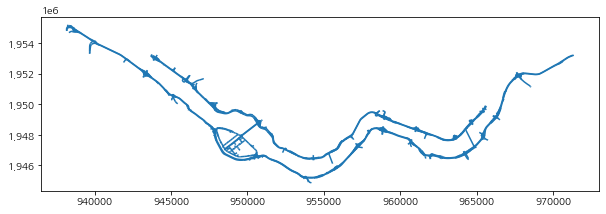

In [12]:
#한강 주변도로만 가져오기.
pd.concat([seoul[seoul.road_name.apply(lambda x: '올림픽대' in x if type(x)==str else False)],\
          seoul[seoul.road_name.apply(lambda x: '강변북로' in x if type(x)==str else False)],\
          seoul[(seoul.road_name.apply(lambda x: '여의' in x if type(x)==str else False))&\
                ~(seoul.road_name.apply(lambda x: '여의대방' in x if type(x)==str else False))],\
          ],axis=0).plot()

In [13]:
data=pd.concat([seoul[seoul.road_name.apply(lambda x: '올림픽대' in x if type(x)==str else False)],\
          seoul[seoul.road_name.apply(lambda x: '강변북로' in x if type(x)==str else False)],\
          seoul[(seoul.road_name.apply(lambda x: '여의' in x if type(x)==str else False))&\
                ~(seoul.road_name.apply(lambda x: '여의대방' in x if type(x)==str else False))],\
          ],axis=0)

In [14]:
data = gpd.GeoDataFrame(data, crs='epsg:4326', geometry='geometry')

In [37]:
tmp = data.to_crs(epsg=4326)

list(tmp.geometry[145334].coords)

In [18]:
#따릉이 자전거 데이터 불러오기
bla = pd.read_csv('./bla.csv')

bla['geometry'] = bla.apply(lambda row: Point(row['경도'], row['위도']), axis=1)
bla = gpd.GeoDataFrame(bla, crs='epsg:4326', geometry='geometry')

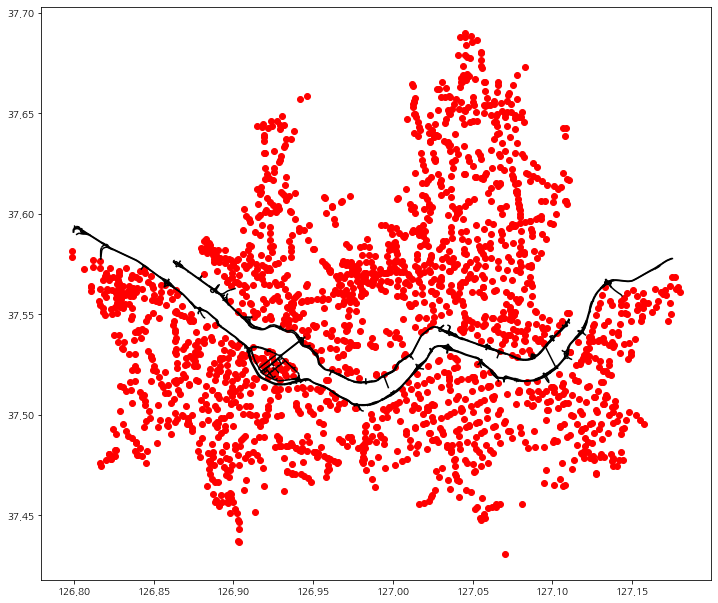

In [20]:
#따릉이 거치소와 한강변 도로 시각화
ax = tmp.plot(color='k',figsize=(12,12))
bla.plot(ax=ax, color='r')

▶ hddd.ddddd˚ : [도] 포맷이라 하며, 도(˚)단위 정수 이하를 소수로 표현한 경우로 소수 여섯째자리에서 반올림하여 소수 다섯째짜리까지 표기합니다. 
    여기서 사용된 약자중 h는 반구(Hemisphere)를 뜻하는 것으로 북위.남위 또는 동경.서경을 표현한 것이고, d는 도(Degree)를 뜻합니다. 
    경기도 기역에서 위도 0.00001˚ 차이는 약 1.1m 거리에 해당하며, 경도 0.00001˚ 차이는 약 0.9m 거리에 해당합니다

meter=1.0247175113158795e-05 #미터단위

In [39]:
#한강의 도로 선을 buffer을 통해 400m 범위를 준다.
tmp['geometry'] = tmp.buffer(1.0247175113158795e-05*400)

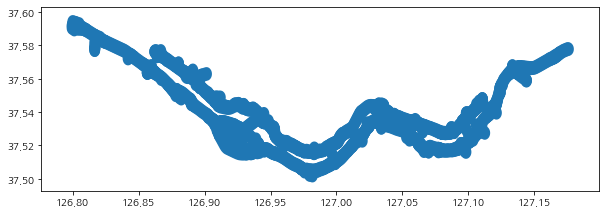

In [40]:
tmp.plot()

In [41]:
#400m 늘어난 한강도로 범위 안에 따릉이가 포함되어있는지 여부를 판별
from tqdm.notebook import tqdm
hangan_bike_loc_list = []
for i in tqdm(range(len(bla)),desc='진행도'):
    if tmp.geometry.contains(bla.loc[i,'geometry']).sum()!=0:
        hangan_bike_loc_list.append(1)
    elif tmp.geometry.contains(bla.loc[i,'geometry']).sum()==0:  
        hangan_bike_loc_list.append(0)

In [42]:
bike_number = bla[['대여소번호']]

bike_number['한강400m내여부'] = hangan_bike_loc_list

In [44]:
bike_number.한강400m내여부.value_counts()

0    1864
1     179
Name: 한강400m내여부, dtype: int64

In [45]:
bike_number

,대여소번호,한강400m내여부
0,1001,0
1,1002,0
2,1003,0
3,1004,0
4,1006,0
...,...,...
2038,992,0
2039,993,0
2040,994,0
2041,995,0
